In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import os
import cv2 as cv
import imghdr

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Dropout , AveragePooling2D , BatchNormalization

from tensorflow.keras.metrics import Precision , Recall , BinaryAccuracy

from tensorflow.keras.models import load_model

In [2]:
plt.style.use("ggplot")

### Creating the model

In [21]:
AlexNet = Sequential()

AlexNet.add(Conv2D(96 , kernel_size =(11,11) , input_shape = (227,227,3) , strides = (4,4) , padding = "valid" , activation = "relu" ))
AlexNet.add(MaxPooling2D( pool_size = (3,3) , strides = (2,2) , padding = "valid" ))
AlexNet.add(BatchNormalization()) # Normalizes the inputs for the next layer, by scaling the outputs of current layer.

AlexNet.add(Conv2D(256 , kernel_size =  (11,11) , strides = (1,1) , padding = "valid" , activation = "relu" ))
AlexNet.add(MaxPooling2D( pool_size = (3,3) , strides = (2,2) , padding = "valid" ))
AlexNet.add(BatchNormalization())

AlexNet.add(Conv2D( 384 , kernel_size = (3,3) , strides = (1,1) , padding = "same" , activation = "relu" ))
AlexNet.add(BatchNormalization())

AlexNet.add(Conv2D( 320 , kernel_size = (3,3) , strides = (1,1) , padding = "same" , activation = "relu" ))
AlexNet.add(BatchNormalization())

AlexNet.add(Conv2D( 200 , kernel_size = (3,3) , strides = (1,1) , padding = "same" , activation = "relu" ))
AlexNet.add(MaxPooling2D( pool_size = (3,3) , strides = (2,2) , padding = "valid" ))
AlexNet.add(BatchNormalization())

AlexNet.add(Flatten())

AlexNet.add(Dense( 500 , activation = "relu" ))
#AlexNet.add(Dropout(0.5)) 

# Dropout is a regularization technique used to prevent overfitting.
# So during training alone, half the neurons in each layer are turned off randomly to prevent memorization of patters.
# So during testing, all the neurons are forced to work. 
# Dropout rate of 0.5 (so 50% neurons are turned off during training) is used in Dense layers, while 0.2-0.3 is used in Conv layera.

AlexNet.add(Dense(128 , activation = "relu" ))
AlexNet.add(Dropout(0.5))

AlexNet.add(Dense(5 , activation = "softmax"  ))

In [22]:
AlexNet.compile(optimizer = "adam" , loss = tf.losses.SparseCategoricalCrossentropy() , metrics = ["accuracy"])

In [23]:
AlexNet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 batch_normalization_15 (Ba  (None, 27, 27, 96)        384       
 tchNormalization)                                               
                                                                 
 conv2d_16 (Conv2D)          (None, 17, 17, 256)       2973952   
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 8, 8, 256)         0         
 ng2D)                                                           
                                                      

In [24]:
data_dir = "data"
os.listdir(data_dir)

['ballerina cappuccina',
 'brr brr patapim',
 'lirili larila',
 'tralalero tralala',
 'tung tung tung sahur']

In [25]:
valid = ["jpeg" , "jpg" , "bmp" , "png"]
for image_class in os.listdir(data_dir) :
    for image in os.listdir(os.path.join(data_dir , image_class)) :
        image_path = os.path.join(data_dir , image_class , image)
        try :
            img = cv.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in valid :
                os.remove(image_path)
        except Exception as e :
            continue

In [26]:
data = tf.keras.utils.image_dataset_from_directory("data") 

Found 550 files belonging to 5 classes.


In [27]:
data_iterator = data.as_numpy_iterator() 

In [28]:
batch = data_iterator.next() 

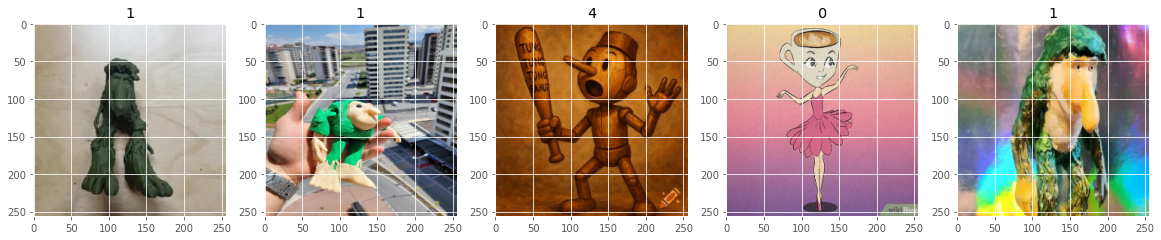

In [29]:
fig , ax = plt.subplots(ncols = 5 , figsize = (20,20))
for idx , img in enumerate(batch[0][:5]) :  
    ax[idx].imshow(img.astype("uint8"))
    ax[idx].title.set_text(batch[1][idx])

In [30]:
scaled = data.map(lambda x, y: (tf.image.resize(x, [227, 227]) / 255.0, y)) 

scaled_iterator = scaled.as_numpy_iterator()

train_size = int(len(scaled) * 0.7)
test_size = int(len(scaled) * 0.1) + 1
val_size = int(len(scaled) * 0.2) + 1

train = scaled.take(train_size)
test = scaled.skip(train_size).take(test_size)
val = scaled.skip(train_size + test_size).take(val_size)

In [31]:
logdir = "logs_alex"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [32]:
hist = AlexNet.fit(train , epochs = 20 , validation_data = val , callbacks = [tensorboard_callback])

Epoch 1/20
12/12 [==============================] - 87s 7s/step - loss: 1.8456 - accuracy: 0.4167 - val_loss: 14.2974 - val_accuracy: 0.2255
Epoch 2/20
12/12 [==============================] - 82s 7s/step - loss: 1.5114 - accuracy: 0.5182 - val_loss: 27.0502 - val_accuracy: 0.2745
Epoch 3/20
12/12 [==============================] - 83s 7s/step - loss: 1.1075 - accuracy: 0.6198 - val_loss: 8.2371 - val_accuracy: 0.2647
Epoch 4/20
12/12 [==============================] - 80s 6s/step - loss: 0.9868 - accuracy: 0.6589 - val_loss: 8.6251 - val_accuracy: 0.2353
Epoch 5/20
12/12 [==============================] - 85s 7s/step - loss: 0.8720 - accuracy: 0.6901 - val_loss: 3.8783 - val_accuracy: 0.2549
Epoch 6/20
12/12 [==============================] - 86s 7s/step - loss: 0.7170 - accuracy: 0.7474 - val_loss: 5.4609 - val_accuracy: 0.4020
Epoch 7/20
12/12 [==============================] - 86s 7s/step - loss: 0.7444 - accuracy: 0.7578 - val_loss: 2.9365 - val_accuracy: 0.3922
Epoch 8/20
12/12 [

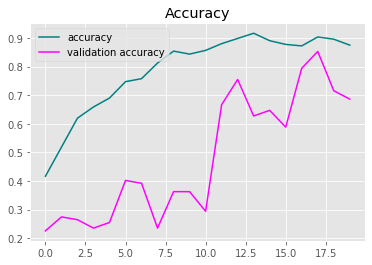

In [43]:
plt.plot(hist.history["accuracy"] , color = "teal" , label = "accuracy")
plt.plot(hist.history["val_accuracy"] , color = "magenta" , label = "validation accuracy")
plt.title("Accuracy")
plt.legend(loc = "upper left")
plt.show()

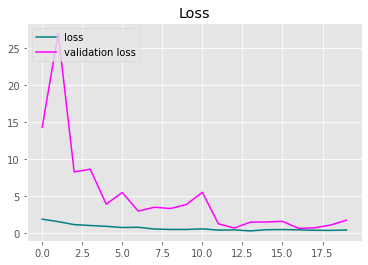

In [44]:
plt.plot(hist.history["loss"] , color = "teal" , label = "loss")
plt.plot(hist.history["val_loss"] , color = "magenta" , label = "validation loss")
plt.title("Loss")
plt.legend(loc = "upper left")
plt.show()

In [35]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [36]:
for batch in test.as_numpy_iterator():
    x, y = batch
    
    yhat = AlexNet.predict(x)

    y_pred = tf.argmax(yhat, axis=1, output_type=tf.int64)

    y_true = tf.convert_to_tensor(y, dtype=tf.int64)

    pre.update_state(y_true, y_pred)
    re.update_state(y_true, y_pred)
    acc.update_state(y_true, y_pred)

1/1 [==============================] - 2s 2s/step


In [37]:
print(f"Precision : {pre.result()} , Recall : {re.result()} , Accuracy : {acc.result()}")

Precision : 1.0 , Recall : 0.936170220375061 , Accuracy : 0.4375


[]

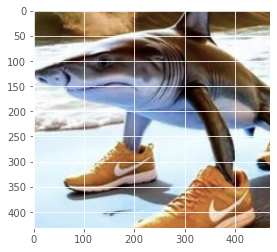

In [38]:
img = cv.imread("tralalero_test.png")
plt.imshow(img)
plt.plot()

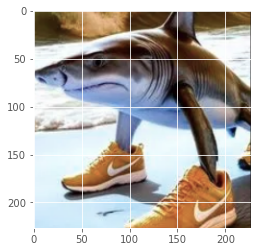

In [39]:
resize = tf.image.resize(img , (227,227))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
yhat = AlexNet.predict(np.expand_dims(resize/255 , 0))
ans = list(yhat[0]).index(max(list(yhat[0])))
if(ans == 0) :
    print("Ballerina Cappucina")
elif (ans == 1) :
    print("Brr Brr Patapim")
elif (ans == 2) :
    print("Lirilla Larila")
elif (ans == 3) :
    print("Tralalero Tralala")
elif (ans == 4) :
    print("Tung Tung Tung Tung Tung Tung Tung Sahur")

1/1 [==============================] - 2s 2s/step
Tralalero Tralala


In [42]:
AlexNet.save(os.path.join("models" , "breinrot_classifier_AlexNet.keras"))